# The Perceptron & The Computational World Behind it ! 

Agenda: 

1) Physiological Neurons and The idea of a Perceptron
2) The importance of the non_linearity lens
3) The Perceptron Model in action
4) The model and the choice of the non_linearity induction
5) The model and the choice of the loss function
6) Optimizations Methods 
7) The Bayesian Perceptron 

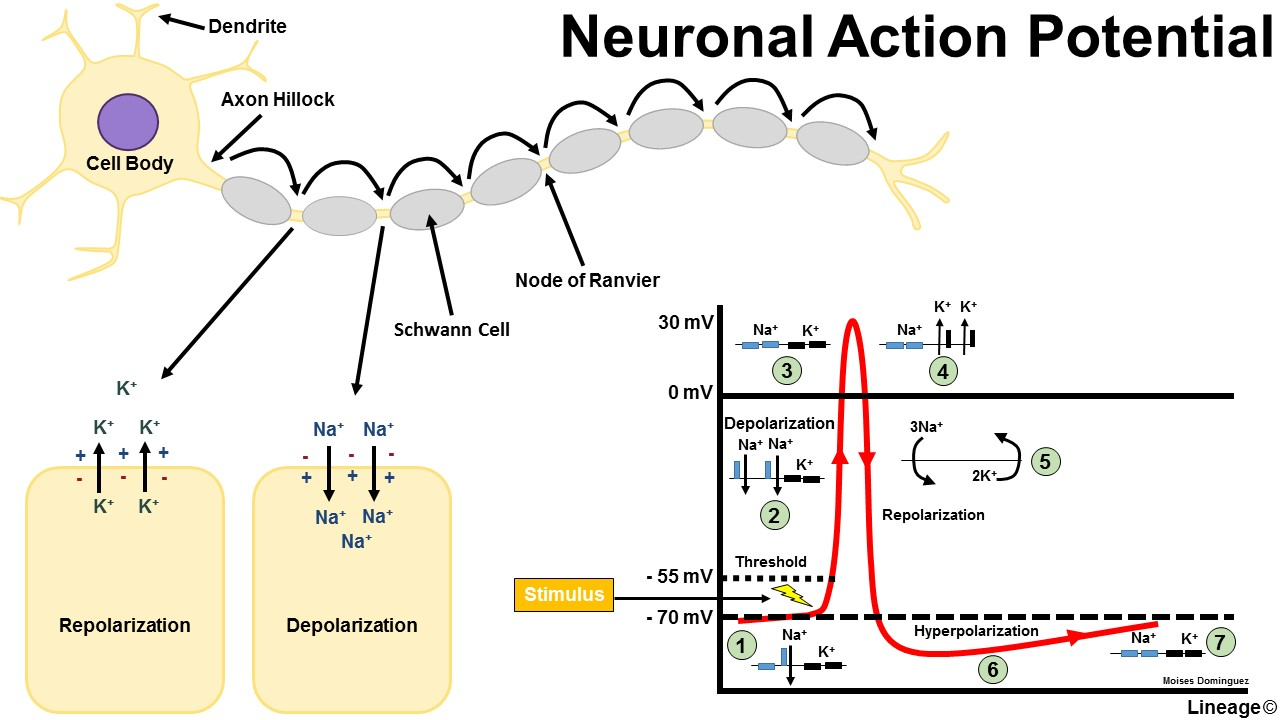

Image Resource Citations:https://step1.medbullets.com/neurology/113052/action-potential-basics

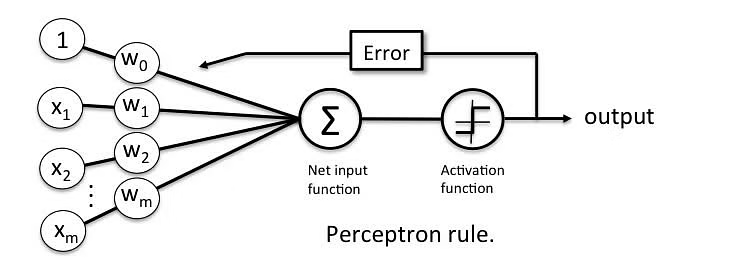

Image Source Citation:https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron

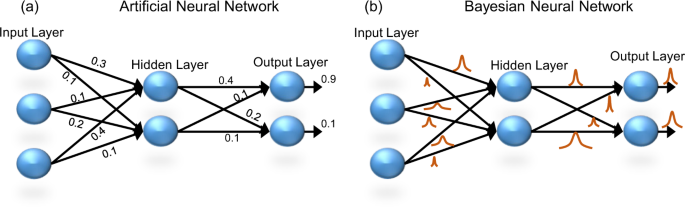

Image Resource Citations:https://www.nature.com/articles/s41467-022-33699-7

# Before the model , some preliminaries 

Linear Dependancies Demonstration 

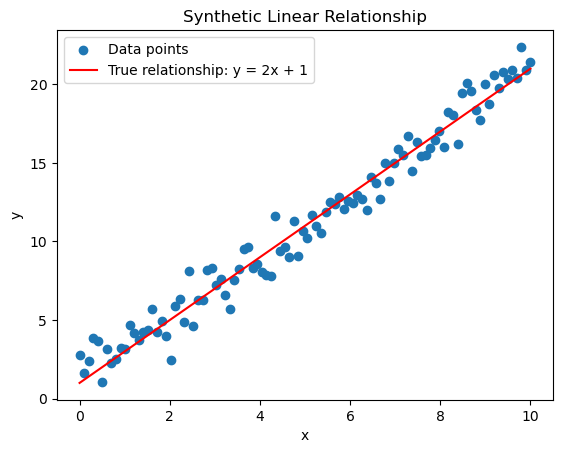

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, size=x.shape)

# Visualize the data
plt.scatter(x, y, label='Data points')
plt.plot(x, 2 * x + 1, color='red', label='True relationship: y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Linear Relationship')
plt.legend()
plt.show()


Non_linear Dependancies Demonstration : example 1 

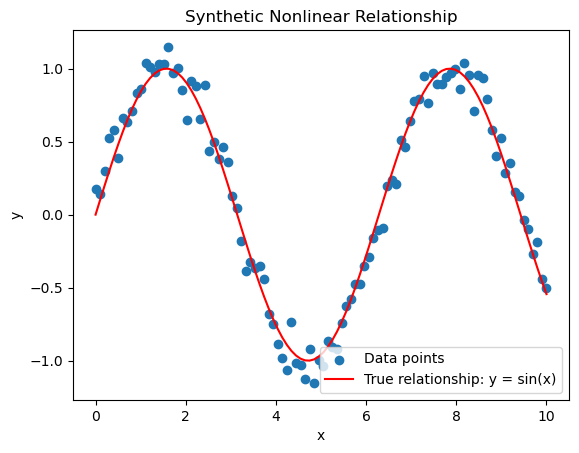

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)  # Nonlinear relationship with noise

# Visualize the data
plt.scatter(x, y, label='Data points')
plt.plot(x, np.sin(x), color='red', label='True relationship: y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Nonlinear Relationship')
plt.legend()
plt.show()


Non-linearity dependancies :example 2 

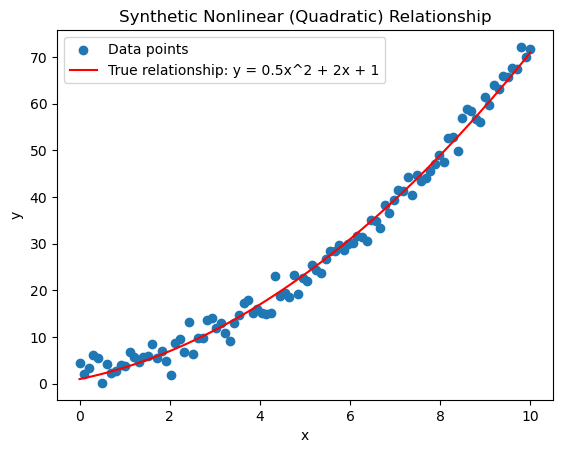

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 0.5 * x**2 + 2 * x + 1 + np.random.normal(0, 2, size=x.shape)  # Nonlinear (quadratic) relationship with noise

# Visualize the data
plt.scatter(x, y, label='Data points')
plt.plot(x, 0.5 * x**2 + 2 * x + 1, color='red', label='True relationship: y = 0.5x^2 + 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Nonlinear (Quadratic) Relationship')
plt.legend()
plt.show()


Non_linearity induction by Sigmoid function

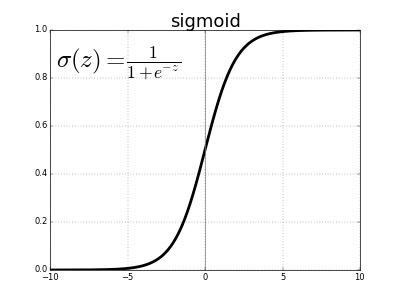

Image Source citation :https://www.kaggle.com/discussions/general/197117

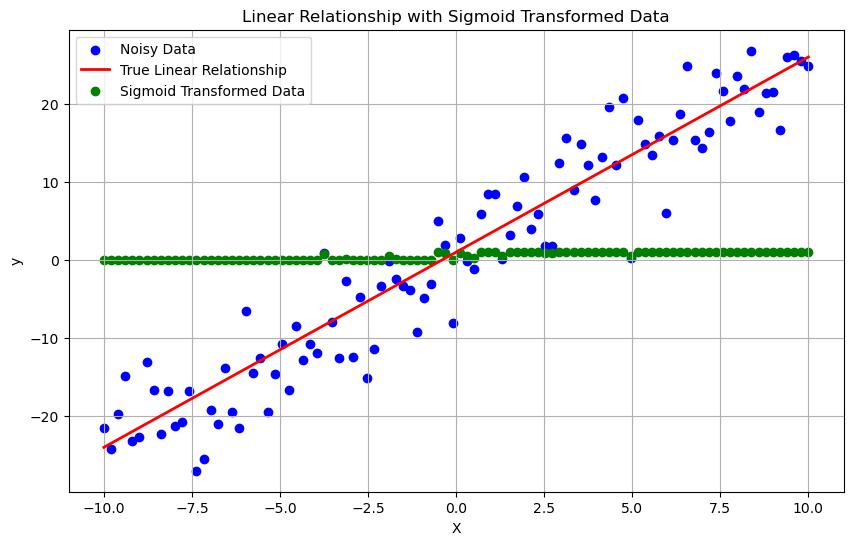

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 1: Generate synthetic data with a wider range
np.random.seed(42)  # for reproducibility
X = np.linspace(-10, 10, 100)  # wider range for X
slope = 2.5
intercept = 1.0
y_true = slope * X + intercept

# Step 2: Add noise to the data
noise = np.random.normal(0, 5, X.shape)  # increase noise
y_noisy = y_true + noise

# Step 3: Apply the sigmoid activation function to introduce nonlinearity
y_sigmoid = sigmoid(y_noisy)

# Step 4: Plot the original and transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X, y_noisy, label='Noisy Data', color='blue')
plt.plot(X, y_true, label='True Linear Relationship', color='red', linewidth=2)
plt.scatter(X, y_sigmoid, label='Sigmoid Transformed Data', color='green')
plt.title('Linear Relationship with Sigmoid Transformed Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Non_linearity induction by Releu function:


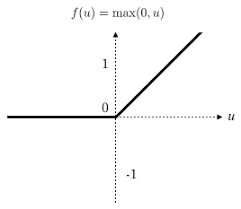
Image Source citation:https://medium.com/@preshchima/activation-functions-relu-softmax-87145bf39288

Non_linearity induced by Hyperbolic Tangent (tanh):

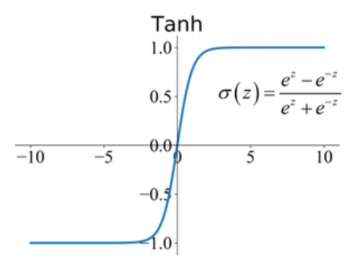

Image Source Citation:https://vinija.ai/concepts/activation/

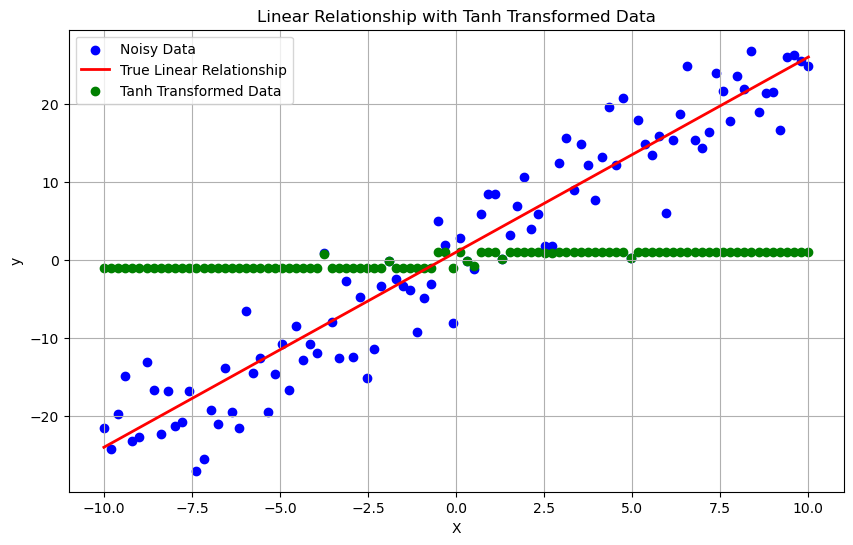

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Step 1: Generate synthetic data with a wider range
np.random.seed(42)  # for reproducibility
X = np.linspace(-10, 10, 100)  # wider range for X
slope = 2.5
intercept = 1.0
y_true = slope * X + intercept

# Step 2: Add noise to the data
noise = np.random.normal(0, 5, X.shape)  # increase noise
y_noisy = y_true + noise

# Step 3: Apply the tanh activation function to introduce nonlinearity
y_tanh = tanh(y_noisy)

# Step 4: Plot the original and transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X, y_noisy, label='Noisy Data', color='blue')
plt.plot(X, y_true, label='True Linear Relationship', color='red', linewidth=2)
plt.scatter(X, y_tanh, label='Tanh Transformed Data', color='green')
plt.title('Linear Relationship with Tanh Transformed Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Install all the dependancies 

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

# Load dataset

In [82]:
from sklearn.datasets import load_breast_cancer

In [83]:
data = load_breast_cancer()
X = data.data
y = data.target

In [84]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y


In [85]:
df.shape

(569, 31)

In [86]:
# Display the first few rows of the dataframe
print(df.head(1))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0           0.1184   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2776          0.3001               0.1471         0.2419   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   

   worst symmetry  worst fractal dimension  target  
0          0.4601                   0.1189       0  

[1 rows x 31 columns]


In [87]:
# Convert any infinite values to NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [88]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


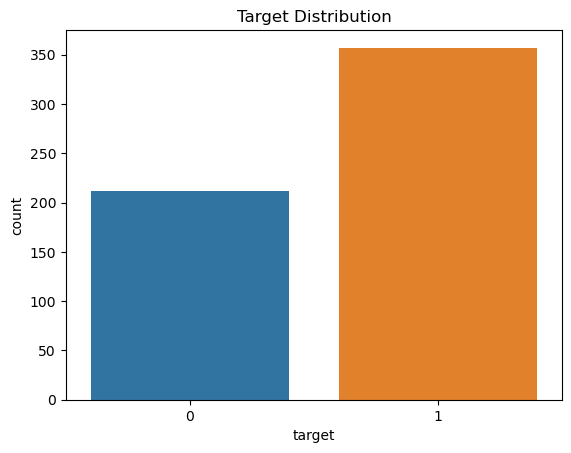

In [89]:
# Target distribution
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

C:\Users\rezan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rezan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rezan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rezan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

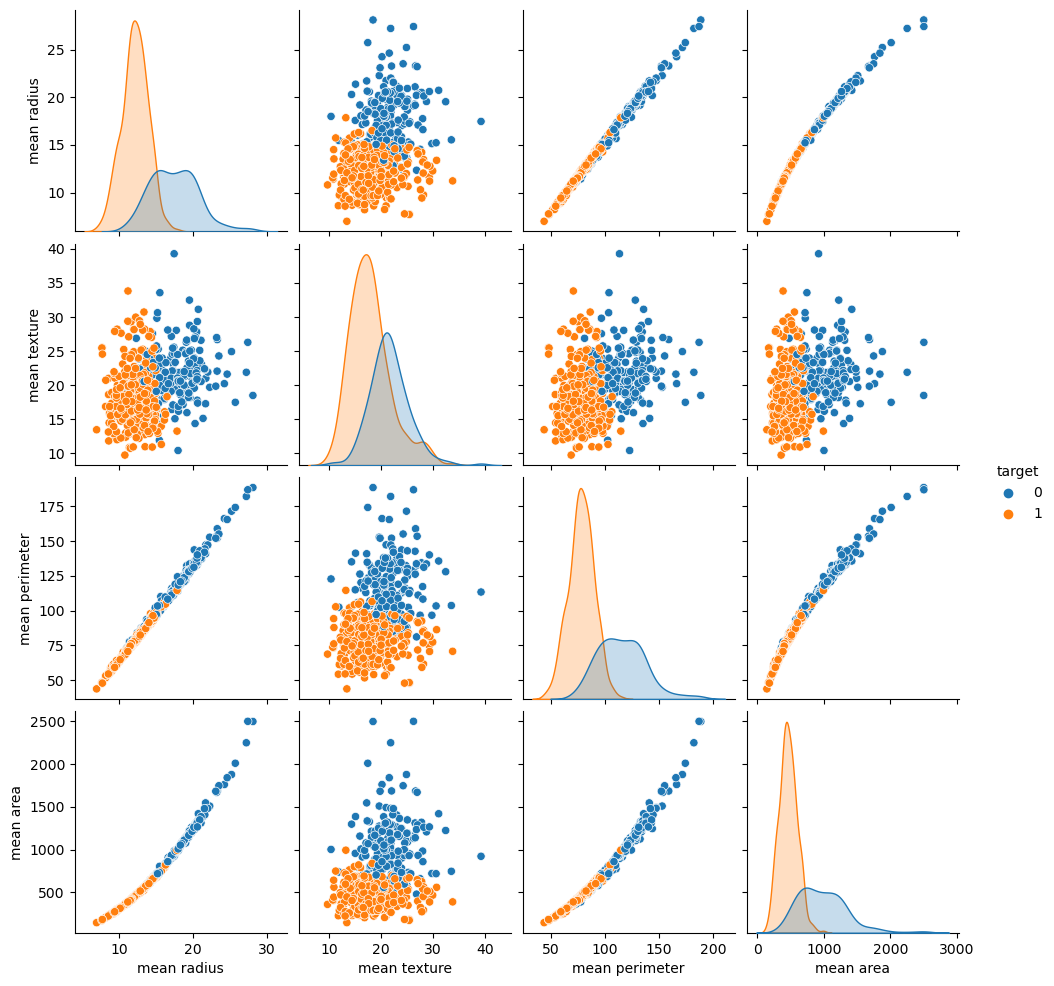

In [90]:
# Pairplot for a few features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue='target')
plt.show()

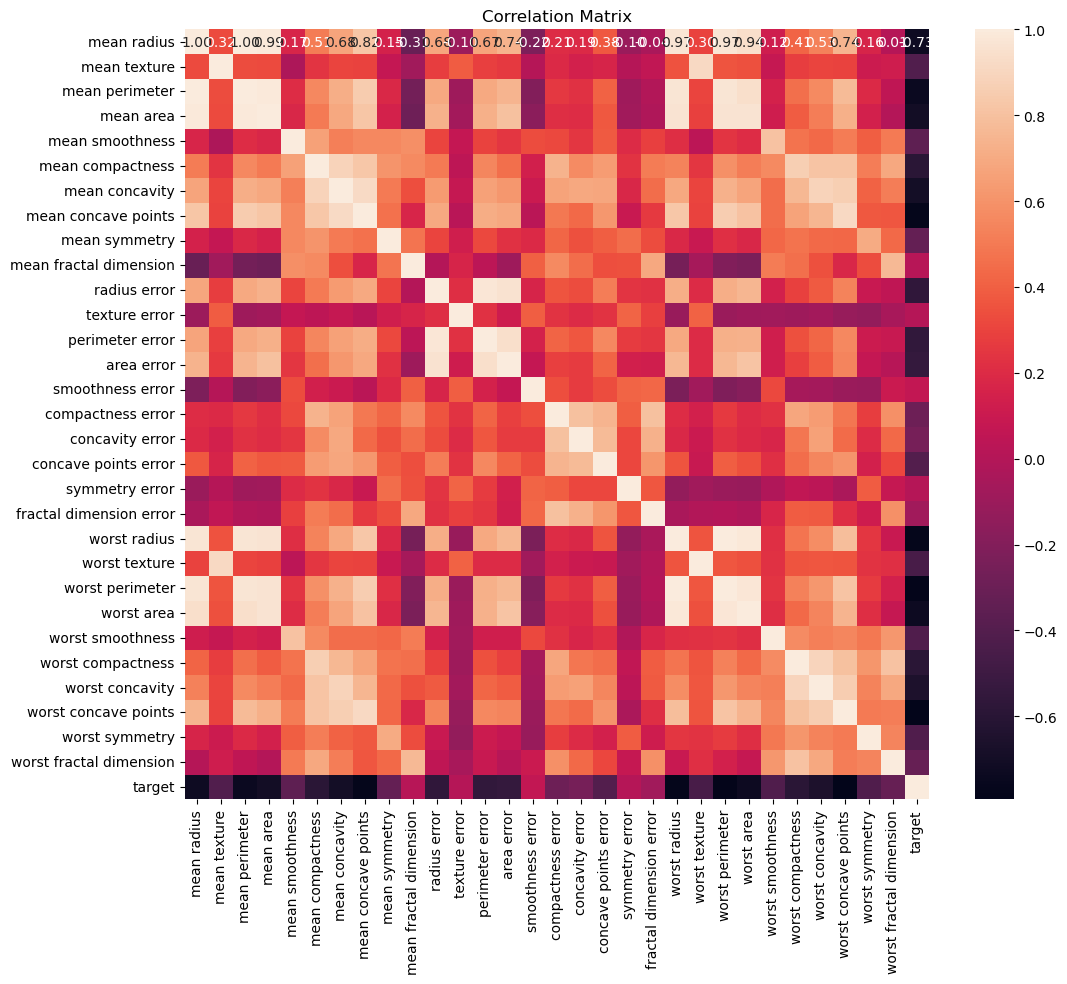

In [91]:

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Perceptron Architect 

In [92]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [94]:
# Check the shape of the data
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (569, 30)
Shape of y: (569,)


In [95]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the perceptron model

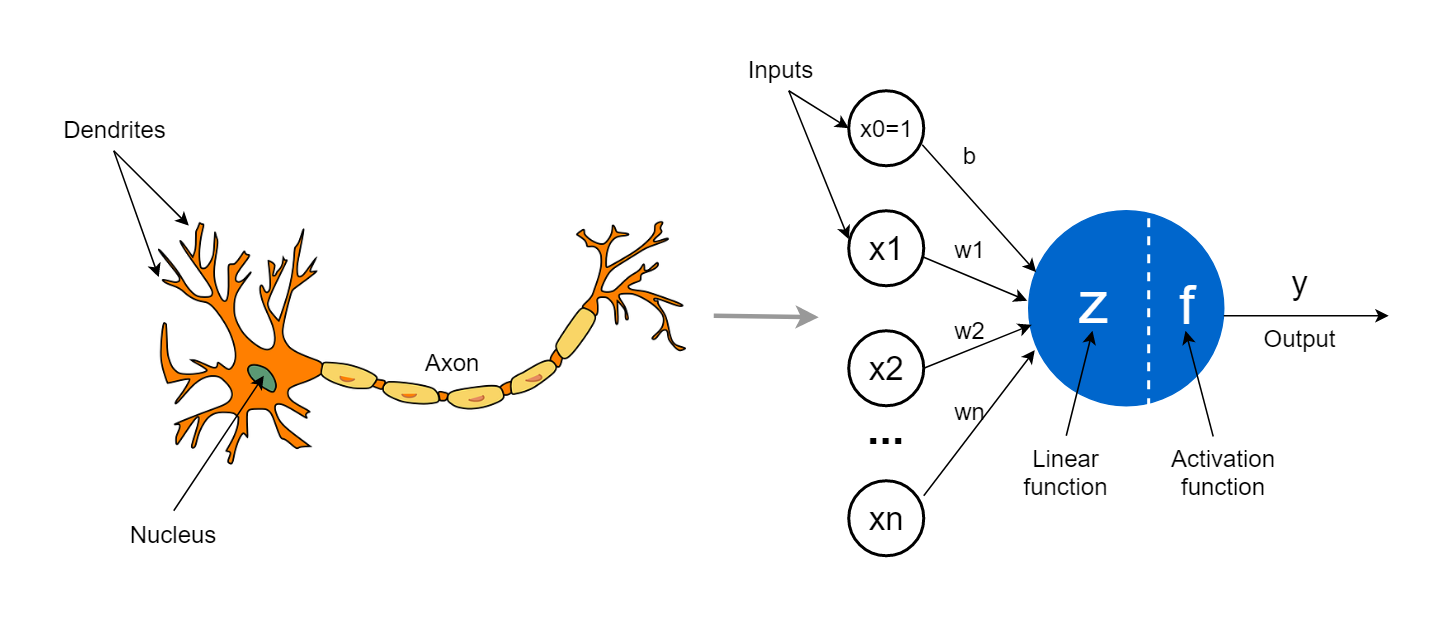!

Image Resource Citation: https://towardsdatascience.com/the-concept-of-artificial-neurons-perceptrons-in-neural-networks-fab22249cbfc

In [99]:
X_train.shape[1]

30

In [100]:
model = Sequential()  # Initializes the model 
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4781 - loss: 0.7840 - val_accuracy: 0.5875 - val_loss: 0.7197
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 0.5936 - val_accuracy: 0.7375 - val_loss: 0.5813
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8035 - loss: 0.4814 - val_accuracy: 0.8500 - val_loss: 0.4858
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8590 - loss: 0.4158 - val_accuracy: 0.8750 - val_loss: 0.4184
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - loss: 0.3691 - val_accuracy: 0.8750 - val_loss: 0.3721
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9207 - loss: 0.3200 - val_accuracy: 0.8875 - val_loss: 0.3368
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.2864 - val_accuracy: 0.9125 - val_loss: 0.3088
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9512 - loss: 0.2550 - val_accuracy: 0.9125 - val_loss:

In [103]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perceptron Model - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1947  
Perceptron Model - Loss: 0.1989, Accuracy: 0.9474


In [104]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

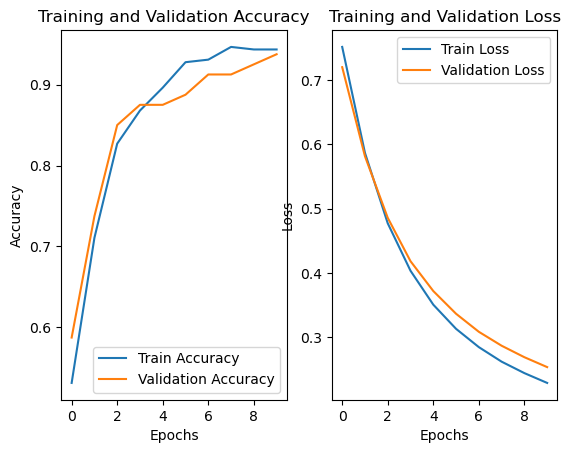

In [109]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [107]:
# Extract weights and biases
weights, biases = model.layers[0].get_weights()

print("Weights:", weights)
print("Biases:", biases)

Weights: [[-0.24489361]
 [ 0.10941651]
 [-0.05128682]
 [-0.14413843]
 [-0.15772656]
 [ 0.24009019]
 [-0.60384005]
 [-0.5481185 ]
 [-0.46126527]
 [ 0.1951743 ]
 [-0.39899087]
 [-0.17168814]
 [-0.442491  ]
 [-0.5659402 ]
 [ 0.38115427]
 [ 0.0066122 ]
 [ 0.10899288]
 [ 0.24835826]
 [ 0.26238236]
 [-0.07602628]
 [ 0.04158705]
 [-0.20043951]
 [ 0.08045464]
 [-0.38092571]
 [-0.2957104 ]
 [ 0.00143174]
 [ 0.15985943]
 [ 0.05586363]
 [ 0.09001886]
 [-0.48288313]]
Biases: [0.14050561]


Text(0.5, 1.0, 'Bias of the Perceptron')

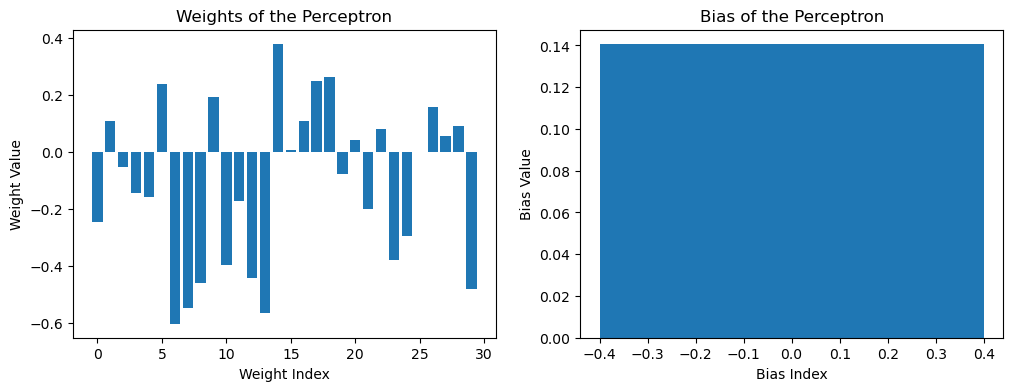

In [112]:
# Visualize weights
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(range(len(weights)), weights.flatten())
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Weights of the Perceptron')

# Visualize biases
plt.subplot(1, 2, 2)
plt.bar([0], biases)
plt.xlabel('Bias Index')
plt.ylabel('Bias Value')
plt.title('Bias of the Perceptron')

# Activation Function Choice Vs. Model Training 

Training model with activation function: sigmoid


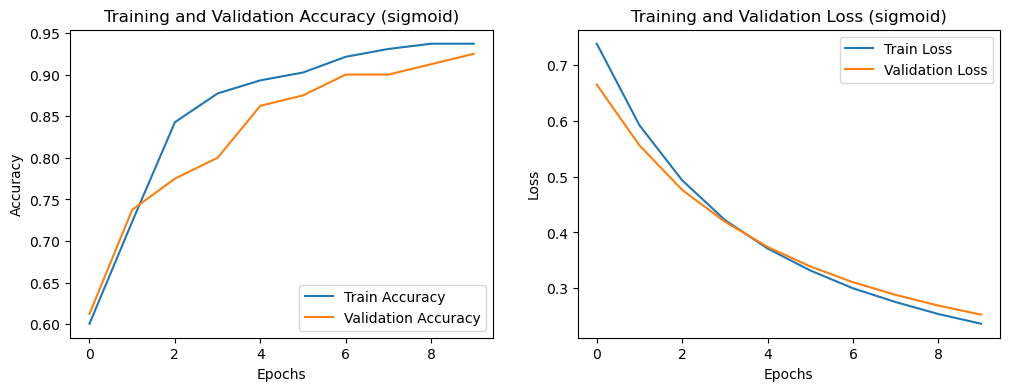

Training model with activation function: relu


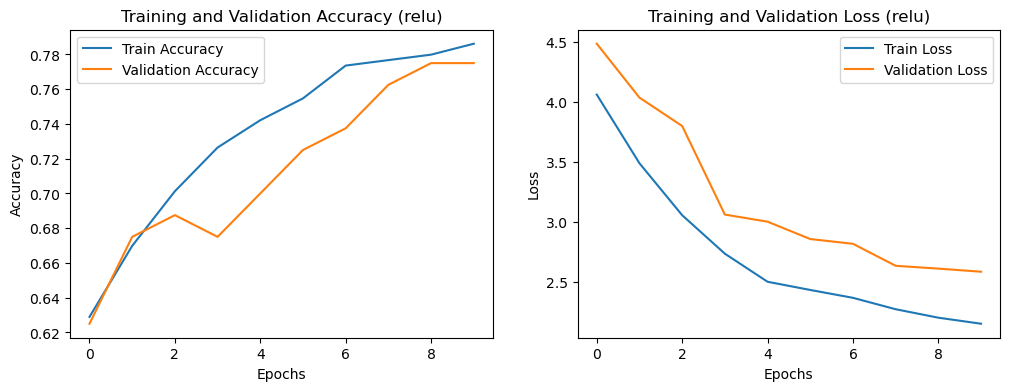

Training model with activation function: tanh


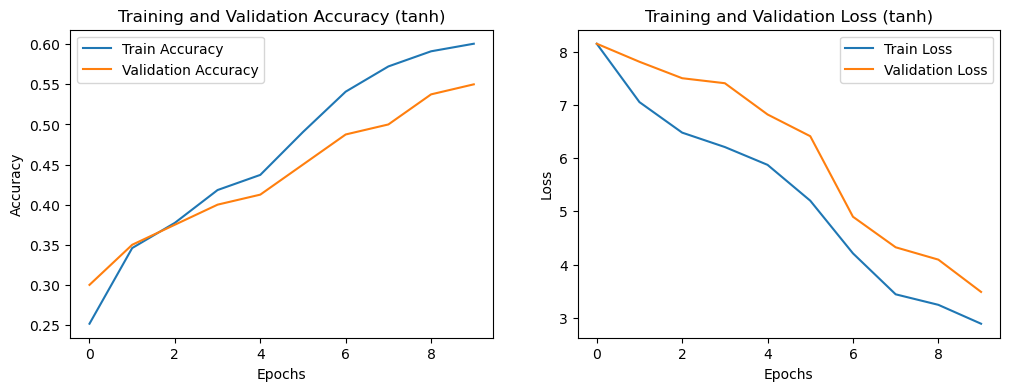

Training model with activation function: softmax


C:\Users\rezan\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\rezan\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


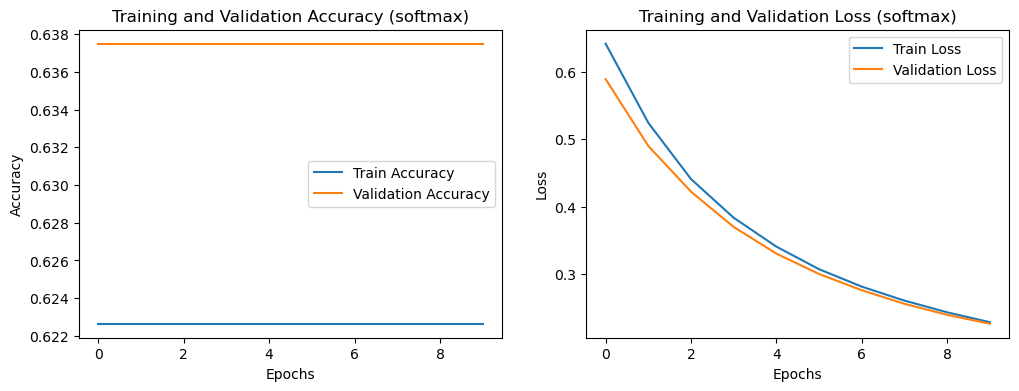

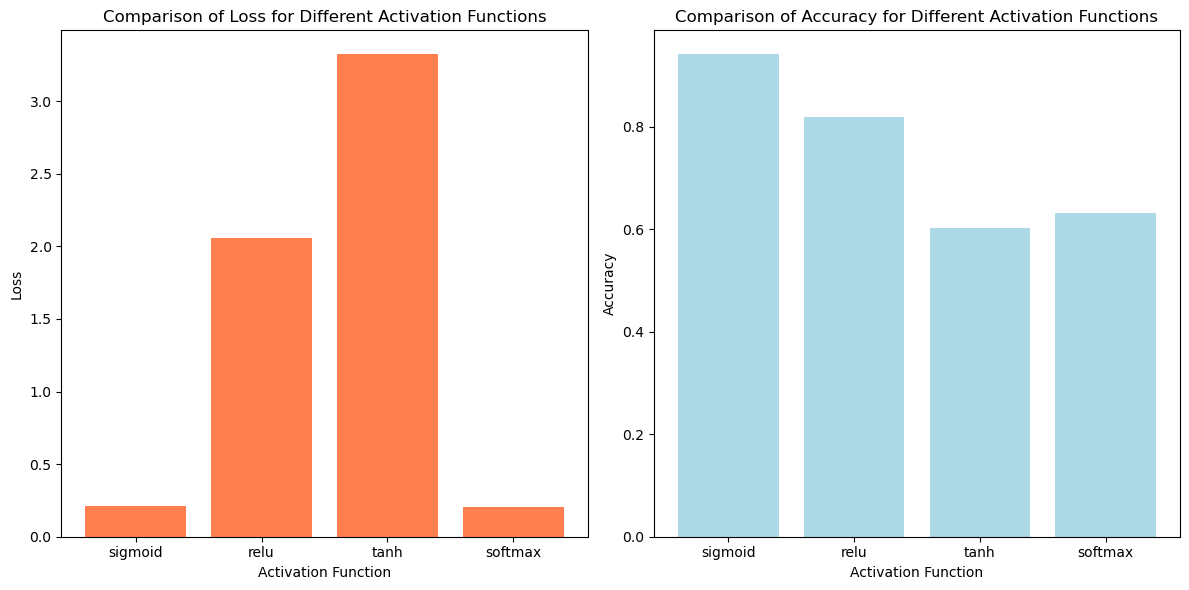

In [113]:
# Define activation functions to compare
activation_functions = ['sigmoid', 'relu', 'tanh', 'softmax']

# Initialize dictionaries to store results
results = {'activation': [], 'loss': [], 'accuracy': []}

# Train and evaluate models with different activation functions
for activation in activation_functions:
    print(f"Training model with activation function: {activation}")
    
    # Build the perceptron model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(1, activation=activation))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0, validation_split=0.2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Store results
    results['activation'].append(activation)
    results['loss'].append(loss)
    results['accuracy'].append(accuracy)
    
    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({activation})')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss ({activation})')
    plt.legend()

    plt.show()

# Convert results to arrays for easier plotting
activation_names = np.array(results['activation'])
losses = np.array(results['loss'])
accuracies = np.array(results['accuracy'])

# Plot comparison of loss and accuracy for different activation functions
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.bar(activation_names, losses, color='coral')
plt.xlabel('Activation Function')
plt.ylabel('Loss')
plt.title('Comparison of Loss for Different Activation Functions')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(activation_names, accuracies, color='lightblue')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Activation Functions')

plt.tight_layout()
plt.show()

# Model and the choice of the loss function 

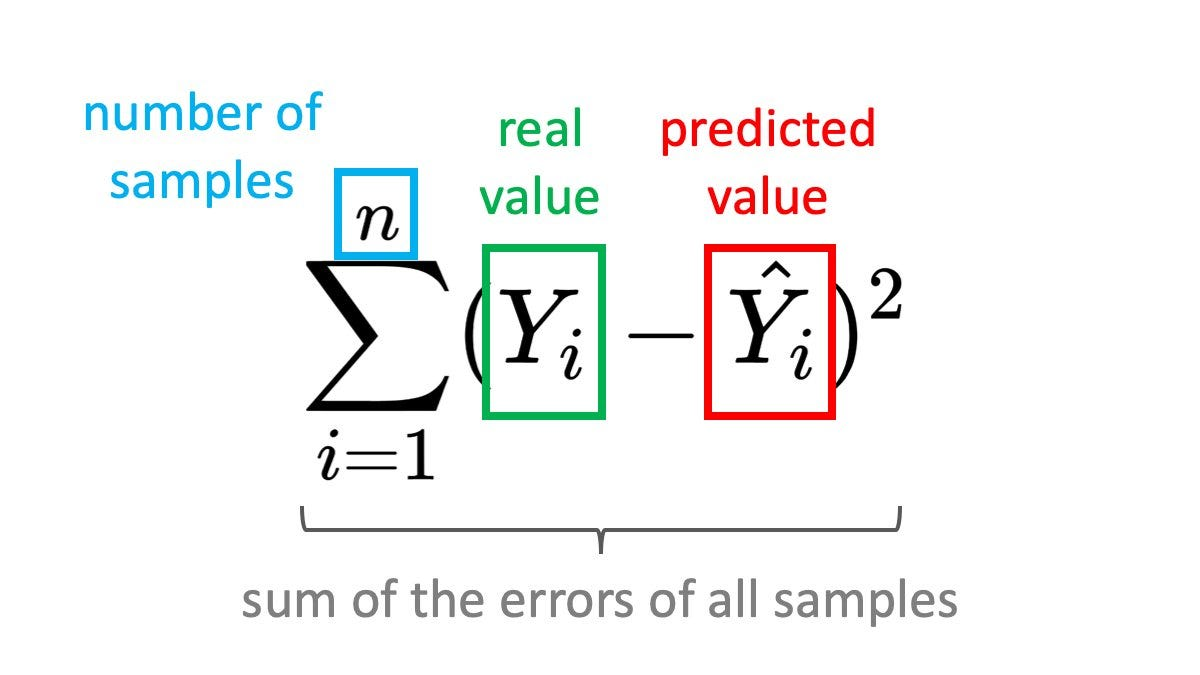

Image Resource Citations:https://levelup.gitconnected.com/understanding-mean-squared-error-a-practical-guide-for-data-scientists-4ec7de03ac0e

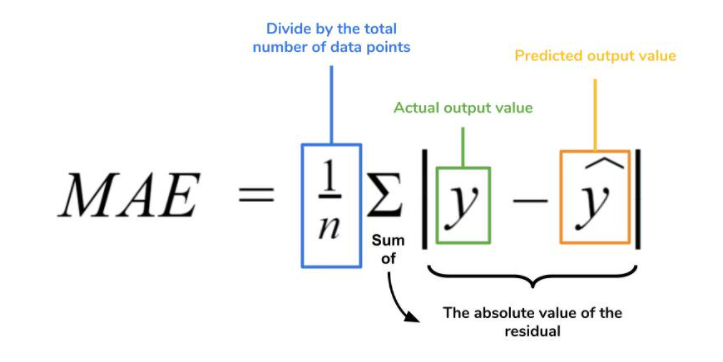

Image Resource Citations:https://medium.com/@polanitzer/the-minimum-mean-absolute-error-mae-challenge-928dc081f031

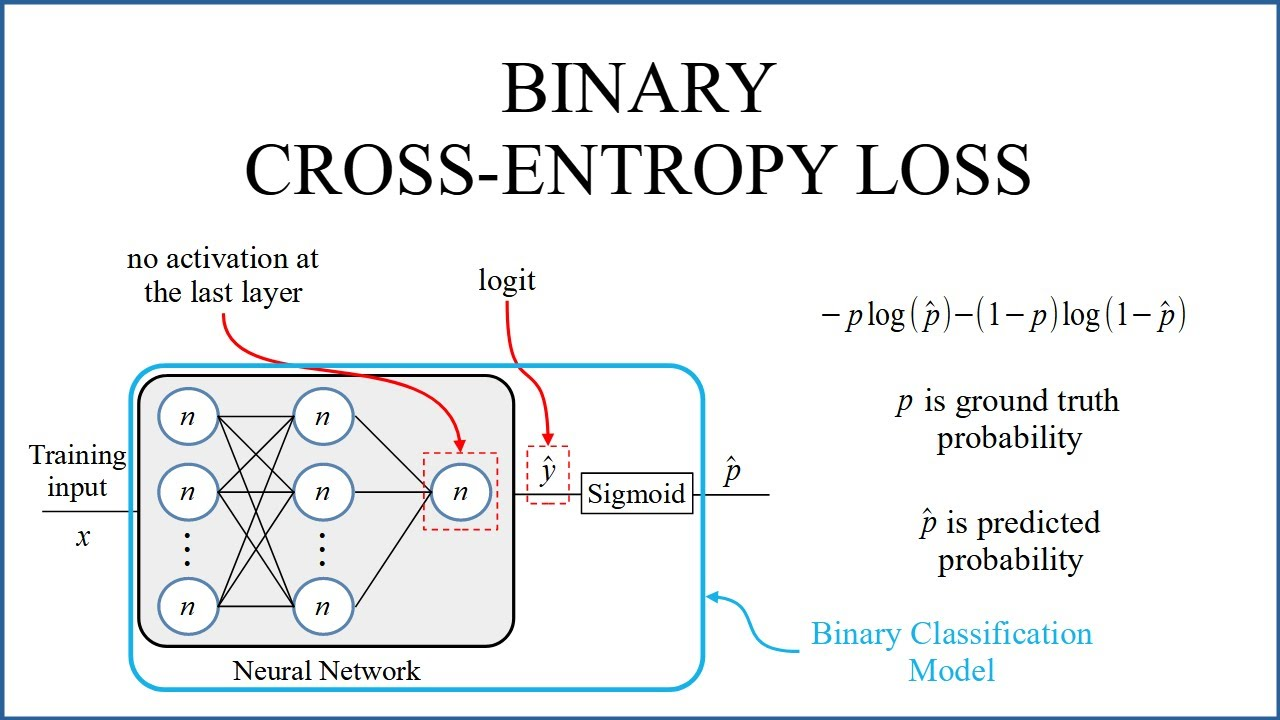

Image Resource Citations:https://www.youtube.com/watch?v=i78buAHKXpI

Training model with loss function: binary_crossentropy


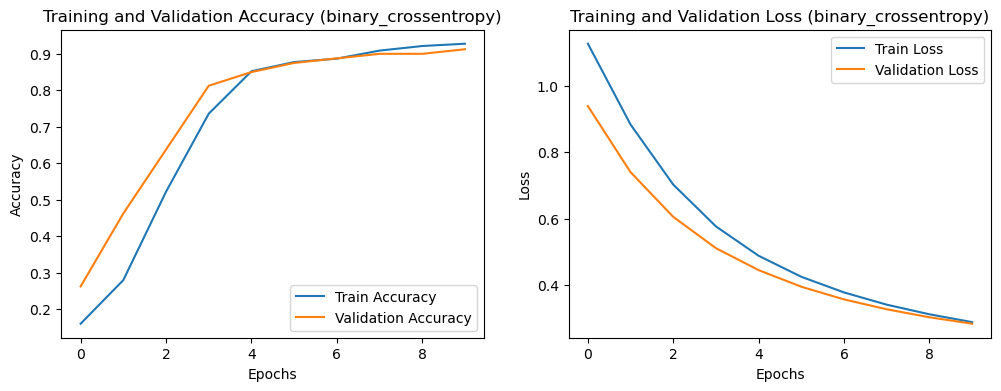

Training model with loss function: mean_squared_error


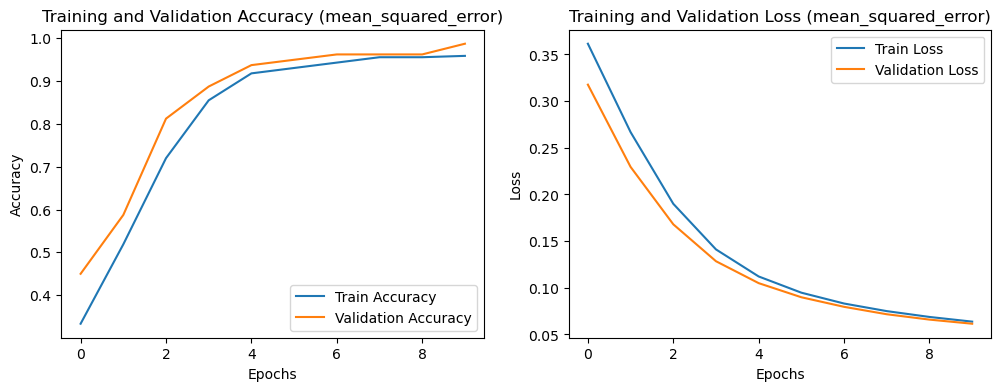

Training model with loss function: mean_absolute_error


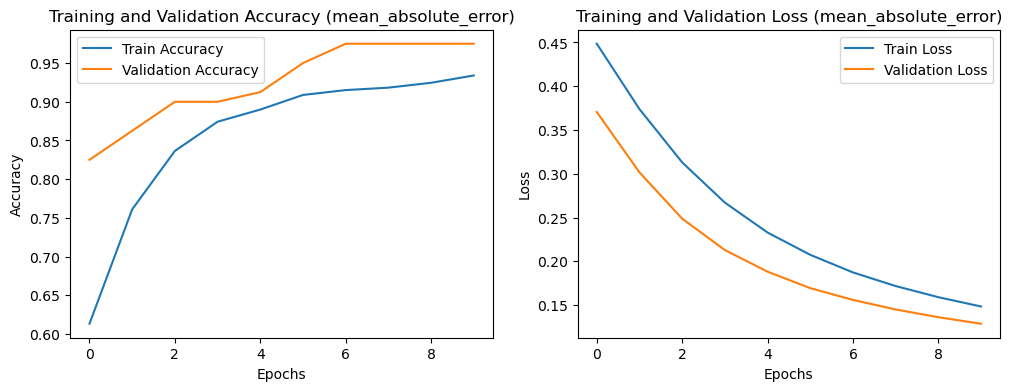

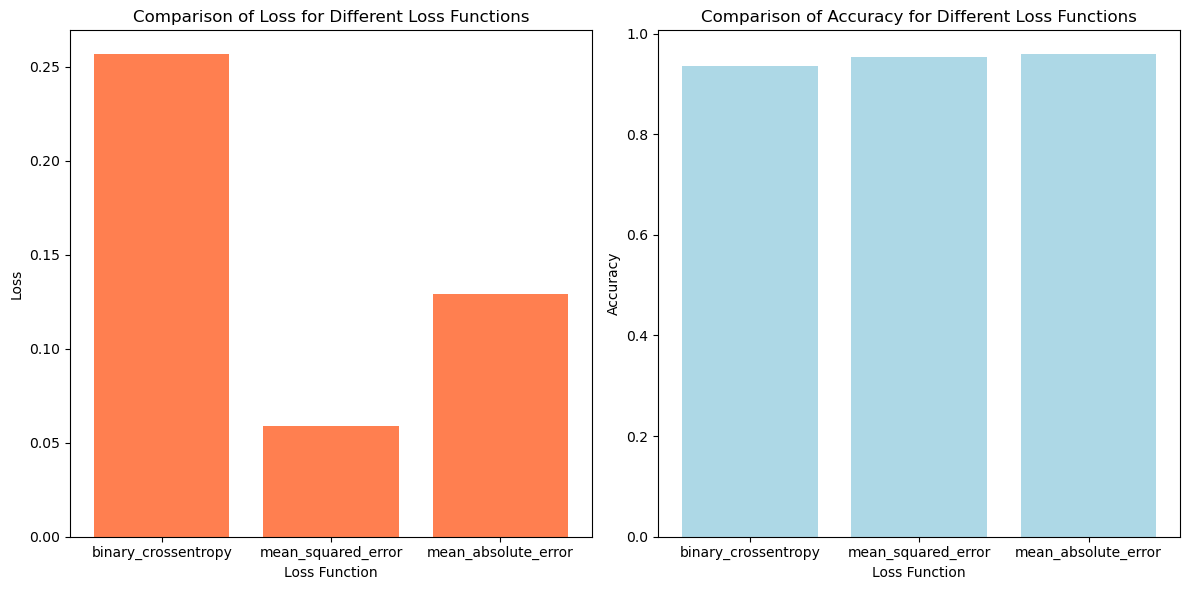

In [114]:
# Define loss functions to compare
loss_functions = ['binary_crossentropy', 'mean_squared_error', 'mean_absolute_error']

# Initialize dictionaries to store results
results = {'loss_function': [], 'loss': [], 'accuracy': []}

# Train and evaluate models with different loss functions
for loss_function in loss_functions:
    print(f"Training model with loss function: {loss_function}")
    
    # Build the perceptron model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))  # Using sigmoid activation for binary classification
    
    model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0, validation_split=0.2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Store results
    results['loss_function'].append(loss_function)
    results['loss'].append(loss)
    results['accuracy'].append(accuracy)
    
    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy ({loss_function})')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss ({loss_function})')
    plt.legend()

    plt.show()

# Convert results to arrays for easier plotting
loss_names = np.array(results['loss_function'])
losses = np.array(results['loss'])
accuracies = np.array(results['accuracy'])

# Plot comparison of loss and accuracy for different loss functions
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.bar(loss_names, losses, color='coral')
plt.xlabel('Loss Function')
plt.ylabel('Loss')
plt.title('Comparison of Loss for Different Loss Functions')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(loss_names, accuracies, color='lightblue')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Loss Functions')

plt.tight_layout()
plt.show()

# The Bayesian Perceptron 

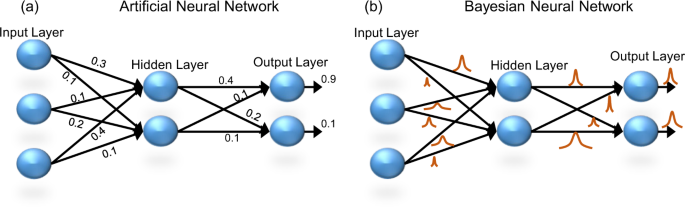

Image Resource Citations:https://www.nature.com/articles/s41467-022-33699-7

In [120]:
!pip install tensorflow tensorflow-probability[tf]


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.7 MB 3.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.7/385.0 MB 20.8 MB/s eta 0:00:19
   ---------------------------------------- 1.3/385.0 MB 16.3 MB/s eta 0:00:24
   ---------------------------------------- 2.1/385.0 MB 16.6 MB/s eta 0:00:24
   ---------------------------------------- 2.7/385.0 MB 15.9 MB/s eta 0:00:25
   ---------------------------------------- 3.6/385.0 MB 16.2 MB/s eta 0:00:24
   ----

  You can safely remove it manually.


In [129]:
!pip install --upgrade tensorflow tensorflow-probability


In [122]:
import tensorflow as tf
import tensorflow_probability as tfp

print("TensorFlow version:", tf.__version__)
print("TensorFlow Probability version:", tfp.__version__)

TensorFlow version: 2.16.1
TensorFlow Probability version: 0.24.0


In [127]:
def create_bayesian_perceptron_model():
    inputs = Input(shape=(X_train.shape[1],))
    
    # Define Bayesian dense layer
    dense_variational = tfp.layers.DenseVariational(
        units=1,
        make_posterior_fn=tfp.layers.default_mean_field_normal_fn(),
        make_prior_fn=tfp.layers.default_multivariate_normal_fn,
        activation='sigmoid'
    )(inputs)
    
    model = Model(inputs=inputs, outputs=dense_variational)
    
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=Adam(),
        metrics=['accuracy']
    )

# Create and train the Bayesian Perceptron model

In [139]:
# Define the Bayesian Perceptron model using Functional API
def create_bayesian_perceptron_model():
    inputs = Input(shape=(X_train.shape[1],))
    
    # Define custom prior function
    def make_prior_fn(dtype, shape, name, trainable, add_variable_fn):
        return tfp.layers.MultivariateNormalDiag(
            num_features=shape[-1],
            dtype=dtype,
            name=name
        )
    
    # Define Bayesian dense layer with custom prior
    dense_variational = tfp.layers.DenseVariational(
        units=1,
        make_posterior_fn=tfp.layers.default_mean_field_normal_fn(),
        make_prior_fn=make_prior_fn,
        activation='sigmoid'
    )(inputs)
    
    model = Model(inputs=inputs, outputs=dense_variational)
    
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    return model